In [1]:
import os
os.chdir("..")

In [19]:
import shap
import numpy as np
from sklearn.model_selection import train_test_split
from rumour_milled.load import load_model, load_data

In [ ]:
data = load_data()
X_train, X_test, y_train, y_test = train_test_split(data["title"], data["fake_news"], test_size=0.2, random_state=42)
X_background = X_train.sample(n=100, random_state=0)

In [27]:
lr_tfidf = load_model("logisticregression", "tfidfvectorizer")
tfidf_vectoriser = lr_tfidf["tfidfvectorizer"]
X_background_vectorised = tfidf_vectoriser.transform(X_background)
X_test_vectorised = tfidf_vectoriser.transform(X_test)
explainer = shap.LinearExplainer(lr_tfidf["logisticregression"], X_background_vectorised)
shap_values = explainer(X_test_vectorised)

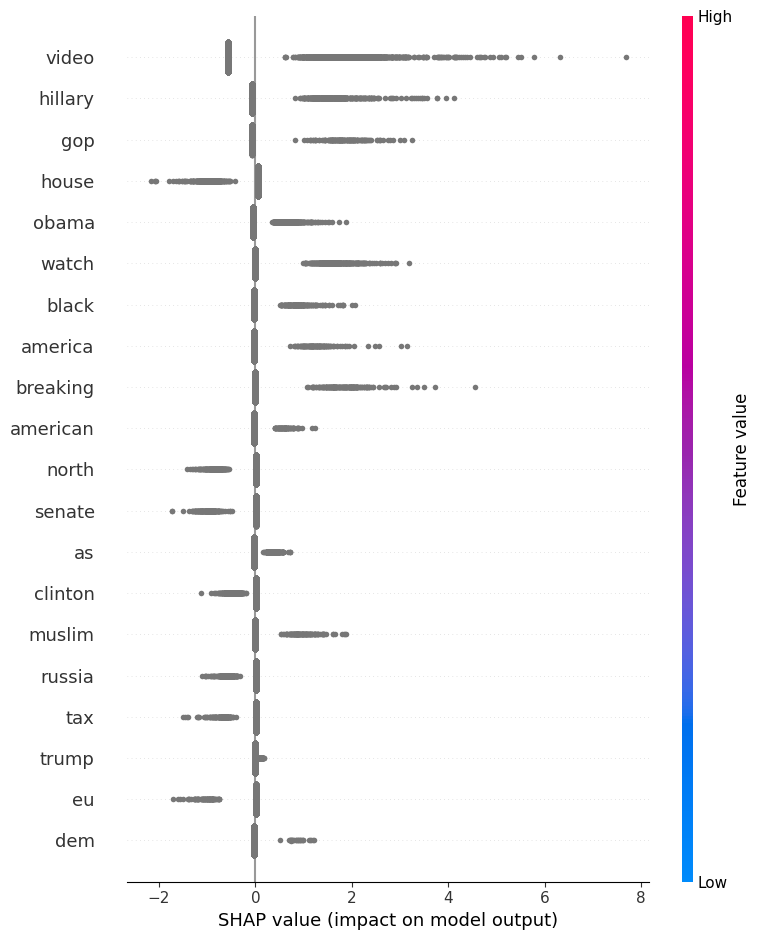

In [29]:
feature_names = tfidf_vectoriser.get_feature_names_out()
shap.summary_plot(shap_values, X_test_vectorised, feature_names=feature_names)